In [2]:
# import libraries
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [3]:
# read in data
accre = pd.read_csv('data/accre_data.txt', sep='|', low_memory=False)
accre.head()

,JobID,JobIDRaw,Cluster,Partition,Account,Group,GID,User,UID,Submit,...,State,NNodes,NCPUS,ReqCPUS,ReqMem,ReqGRES,ReqTRES,Timelimit,NodeList,JobName
0,15806649,15806649,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1085,WOODWARD_TCP-x-228324-x-228324-x-301-x-Multi_A...
1,15806664,15806664,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1099,WOODWARD_TCP-x-115174-x-115174-x-301-x-Multi_A...
2,15806670,15806670,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1126,WOODWARD_TCP-x-215607-x-215607-x-301-x-Multi_A...
3,15806671,15806671,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp230,WOODWARD_TCP-x-116214-x-116214-x-1701-x-Multi_...
4,15811617,15811617,accre,production,cms_samtest,cms_samtest,59297,uscms010,NaN,2017-07-01T05:00:00,...,COMPLETED,1,1,1,4000Mn,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1242,bl_aa7c22e04f21


In [4]:
# look at the shape of the dataset
accre.shape

(12499389, 25)

In [5]:
# identify the column names of the dataset
accre.columns

Index(['JobID', 'JobIDRaw', 'Cluster', 'Partition', 'Account', 'Group', 'GID',
       'User', 'UID', 'Submit', 'Eligible', 'Start', 'End', 'Elapsed',
       'ExitCode', 'State', 'NNodes', 'NCPUS', 'ReqCPUS', 'ReqMem', 'ReqGRES',
       'ReqTRES', 'Timelimit', 'NodeList', 'JobName'],
      dtype='object')

In [6]:
# check data types
accre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12499389 entries, 0 to 12499388
Data columns (total 25 columns):
JobID        object
JobIDRaw     int64
Cluster      object
Partition    object
Account      object
Group        object
GID          int64
User         object
UID          float64
Submit       object
Eligible     object
Start        object
End          object
Elapsed      object
ExitCode     object
State        object
NNodes       int64
NCPUS        int64
ReqCPUS      int64
ReqMem       object
ReqGRES      object
ReqTRES      object
Timelimit    object
NodeList     object
JobName      object
dtypes: float64(1), int64(5), object(19)
memory usage: 2.3+ GB


### In order analyze how long a job waits in the queue, we need to create a 'Queue Time' column. First, need to convert Submit and Start columns to datetime objects.

In [7]:
# convert Submit and Start to datetime
accre['Submit'] = pd.to_datetime(accre['Submit'], format='%Y/%m/%d')
accre['Start'] = pd.to_datetime(accre['Start'], format='%Y/%m/%d')

In [8]:
# check head of Submit
accre.Submit.head()

0   2017-07-02 00:40:58
1   2017-07-02 00:40:58
2   2017-07-02 00:40:58
3   2017-07-02 00:40:58
4   2017-07-01 05:00:00
Name: Submit, dtype: datetime64[ns]

In [9]:
# check head of Start
accre.Start.head()

0   2017-07-03 02:13:59
1   2017-07-03 02:20:08
2   2017-07-03 02:41:13
3   2017-07-03 02:51:53
4   2017-07-01 05:00:01
Name: Start, dtype: datetime64[ns]

##### Now we can subtract Submit from Start to get the Queue Time.

In [10]:
# create Queue_Time column = Start - Submit
accre['Queue_Time'] = accre['Start'] - accre['Submit']
accre.Queue_Time.head()

0   1 days 01:33:01
1   1 days 01:39:10
2   1 days 02:00:15
3   1 days 02:10:55
4   0 days 00:00:01
Name: Queue_Time, dtype: timedelta64[ns]

In [11]:
# remove unnecessary rows to decrease number of columns
cols = ['JobIDRaw','Partition','Cluster','JobName']
accre_reduced_cols = accre.drop(columns=cols)
accre_reduced_cols.head()

,JobID,Account,Group,GID,User,UID,Submit,Eligible,Start,End,...,State,NNodes,NCPUS,ReqCPUS,ReqMem,ReqGRES,ReqTRES,Timelimit,NodeList,Queue_Time
0,15806649,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:13:59,2017-07-04T03:19:20,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1085,1 days 01:33:01
1,15806664,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:20:08,2017-07-04T02:11:55,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1099,1 days 01:39:10
2,15806670,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:41:13,2017-07-04T04:41:04,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1126,1 days 02:00:15
3,15806671,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:51:53,2017-07-04T10:54:13,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp230,1 days 02:10:55
4,15811617,cms_samtest,cms_samtest,59297,uscms010,NaN,2017-07-01 05:00:00,2017-07-01T05:00:00,2017-07-01 05:00:01,2017-07-01T05:00:11,...,COMPLETED,1,1,1,4000Mn,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1242,0 days 00:00:01


In [12]:
# get top 20 groups by JobID
accre_reduced_cols[['GID', 'Group', 'JobID']].groupby(['GID','Group']).agg('count').sort_values(by ='JobID', ascending=False).head(20)

,,JobID
GID,Group,
31000,cms,5069955
59350,beam_lab,1497401
59420,p_csb_meiler,737597
36068,mip_eecs,577413
10023,p_meiler,455407
59298,cms_stage1,454797
59402,lola,449909
59331,h_biostat_student,446182
59422,math,371131


In [13]:
# get bottom 20 groups by jobID
accre_reduced_cols[['GID', 'Group', 'JobID']].groupby(['GID','Group']).agg('count').sort_values(by ='JobID', ascending=True).head(20)

,,JobID
GID,Group,
20483,skaar_lab,4
20807,vuscl,5
59307,h_lasko_lab,6
59284,nbody_gpu,6
20458,trueblood_lab,8
20495,biomath,12
20813,smith_lab,23
59397,aldrich_lab,33
59335,p_blocher,34


In [14]:
# get top 20 groups by user
accre_reduced_cols[['UID', 'User', 'JobID']].groupby(['UID','User']).agg('count').sort_values(by ='JobID', ascending=False).head(20)

,,JobID
UID,User,
207302.0,deik,667769
574202.0,sotocs,646076
9209.0,autocms,471424
9202.0,cmslocal,467394
233240.0,cakira,416327
501421.0,ozgunka,373381
342713.0,zhangdk,371131
173433.0,shockle,308142
171357.0,janjamrk,302093


In [15]:
# get bottom 20 groups by user
accre_reduced_cols[['UID','User','JobID']].groupby(['UID','User']).agg('count').sort_values(by='JobID', ascending=True).head(20)

,,JobID
UID,User,
593160.0,maya3,1
200890.0,elmoree,1
513096.0,carlsobl,1
512952.0,dongew,1
55566.0,dubeya,1
672295.0,pateloj,1
53902.0,barquela,1
508699.0,luok,1
692041.0,millertw,1


In [16]:
# get the most frequent values for ReqMem -- need to import Counter from collections
from collections import Counter

mem_types = Counter(accre_reduced_cols.ReqMem)
mem_types.most_common(10)

[('5000Mn', 2341060),
 ('28000Mn', 2038338),
 ('2Gc', 889885),
 ('1024Mn', 808080),
 ('10Gn', 745088),
 ('8000Mn', 620378),
 ('16000Mn', 615156),
 ('4Gn', 378371),
 ('2000Mn', 374385),
 ('20Gn', 357188)]

In [17]:
# get the most frequent values for ReqMem
accre_reduced_cols.ReqMem.value_counts(ascending=False).head(10)

5000Mn     2341060
28000Mn    2038338
2Gc         889885
1024Mn      808080
10Gn        745088
8000Mn      620378
16000Mn     615156
4Gn         378371
2000Mn      374385
20Gn        357188
Name: ReqMem, dtype: int64

In [18]:
accre_reduced_cols.head()

,JobID,Account,Group,GID,User,UID,Submit,Eligible,Start,End,...,State,NNodes,NCPUS,ReqCPUS,ReqMem,ReqGRES,ReqTRES,Timelimit,NodeList,Queue_Time
0,15806649,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:13:59,2017-07-04T03:19:20,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1085,1 days 01:33:01
1,15806664,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:20:08,2017-07-04T02:11:55,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1099,1 days 01:39:10
2,15806670,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:41:13,2017-07-04T04:41:04,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1126,1 days 02:00:15
3,15806671,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:51:53,2017-07-04T10:54:13,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp230,1 days 02:10:55
4,15811617,cms_samtest,cms_samtest,59297,uscms010,NaN,2017-07-01 05:00:00,2017-07-01T05:00:00,2017-07-01 05:00:01,2017-07-01T05:00:11,...,COMPLETED,1,1,1,4000Mn,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1242,0 days 00:00:01


### Need to convert Timelimit column into a more usable format.

In [19]:
# create requested_days, _hours, _minutes, _seconds to later calculate Timelimit in total seconds
requested_days = pd.to_numeric(accre_reduced_cols['Timelimit'].str[:-9]).fillna(value=0)
requested_hours = pd.to_numeric(accre_reduced_cols['Timelimit'].str[-8:-6])
requested_minutes = pd.to_numeric(accre_reduced_cols['Timelimit'].str[-5:-3])
requested_seconds = pd.to_numeric(accre_reduced_cols['Timelimit'].str[-2:])
requested_days.head(10)

0    9.0
1    9.0
2    9.0
3    9.0
4    2.0
5    0.0
6    0.0
7    2.0
8    0.0
9    0.0
Name: Timelimit, dtype: float64

In [20]:
requested_hours.head(10)

0     4.0
1     4.0
2     4.0
3     4.0
4     0.0
5    12.0
6    12.0
7     0.0
8    12.0
9    12.0
Name: Timelimit, dtype: float64

In [21]:
requested_minutes.head(10)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: Timelimit, dtype: float64

In [22]:
requested_seconds.head(10)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: Timelimit, dtype: float64

In [23]:
# write a formula to get Timelimit in total seconds using the variables requested_days, _hours, _minutes, _seconds
accre_reduced_cols['ReqTime'] = (requested_days*86400)+(requested_hours*3600)+(requested_minutes*60)+requested_seconds
accre_reduced_cols.head()

,JobID,Account,Group,GID,User,UID,Submit,Eligible,Start,End,...,NNodes,NCPUS,ReqCPUS,ReqMem,ReqGRES,ReqTRES,Timelimit,NodeList,Queue_Time,ReqTime
0,15806649,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:13:59,2017-07-04T03:19:20,...,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1085,1 days 01:33:01,792000.0
1,15806664,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:20:08,2017-07-04T02:11:55,...,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1099,1 days 01:39:10,792000.0
2,15806670,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:41:13,2017-07-04T04:41:04,...,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1126,1 days 02:00:15,792000.0
3,15806671,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:51:53,2017-07-04T10:54:13,...,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp230,1 days 02:10:55,792000.0
4,15811617,cms_samtest,cms_samtest,59297,uscms010,NaN,2017-07-01 05:00:00,2017-07-01T05:00:00,2017-07-01 05:00:01,2017-07-01T05:00:11,...,1,1,1,4000Mn,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1242,0 days 00:00:01,172800.0


# Question 1a: How does the amount of memory requested affect a job's queue time?

### First we need to fix the ReqMem column. We need to extract only numeric values and then convert into megabytes for consistency.

In [24]:
accre_reduced_cols.head()

,JobID,Account,Group,GID,User,UID,Submit,Eligible,Start,End,...,NNodes,NCPUS,ReqCPUS,ReqMem,ReqGRES,ReqTRES,Timelimit,NodeList,Queue_Time,ReqTime
0,15806649,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:13:59,2017-07-04T03:19:20,...,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1085,1 days 01:33:01,792000.0
1,15806664,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:20:08,2017-07-04T02:11:55,...,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1099,1 days 01:39:10,792000.0
2,15806670,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:41:13,2017-07-04T04:41:04,...,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1126,1 days 02:00:15,792000.0
3,15806671,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:51:53,2017-07-04T10:54:13,...,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp230,1 days 02:10:55,792000.0
4,15811617,cms_samtest,cms_samtest,59297,uscms010,NaN,2017-07-01 05:00:00,2017-07-01T05:00:00,2017-07-01 05:00:01,2017-07-01T05:00:11,...,1,1,1,4000Mn,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1242,0 days 00:00:01,172800.0


In [25]:
accre_reduced_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12499389 entries, 0 to 12499388
Data columns (total 23 columns):
JobID         object
Account       object
Group         object
GID           int64
User          object
UID           float64
Submit        datetime64[ns]
Eligible      object
Start         datetime64[ns]
End           object
Elapsed       object
ExitCode      object
State         object
NNodes        int64
NCPUS         int64
ReqCPUS       int64
ReqMem        object
ReqGRES       object
ReqTRES       object
Timelimit     object
NodeList      object
Queue_Time    timedelta64[ns]
ReqTime       float64
dtypes: datetime64[ns](2), float64(2), int64(4), object(14), timedelta64[ns](1)
memory usage: 2.1+ GB


### ReqMem is of type object. We need to find the string characters in each cell and split it away from the numeric characters.

In [26]:
# use regular expressions to split the ReqMem column into two - ReqMem_Num and ReqMem_Str
accre_reduced_cols[['ReqMem_Num','ReqMem_Str']] = accre_reduced_cols['ReqMem'].str.extract('(\d+\.?\d*)([A-Za-z]+)', expand=True)
accre_reduced_cols.head()

,JobID,Account,Group,GID,User,UID,Submit,Eligible,Start,End,...,ReqCPUS,ReqMem,ReqGRES,ReqTRES,Timelimit,NodeList,Queue_Time,ReqTime,ReqMem_Num,ReqMem_Str
0,15806649,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:13:59,2017-07-04T03:19:20,...,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1085,1 days 01:33:01,792000.0,12,Gn
1,15806664,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:20:08,2017-07-04T02:11:55,...,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1099,1 days 01:39:10,792000.0,12,Gn
2,15806670,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:41:13,2017-07-04T04:41:04,...,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1126,1 days 02:00:15,792000.0,12,Gn
3,15806671,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:51:53,2017-07-04T10:54:13,...,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp230,1 days 02:10:55,792000.0,12,Gn
4,15811617,cms_samtest,cms_samtest,59297,uscms010,NaN,2017-07-01 05:00:00,2017-07-01T05:00:00,2017-07-01 05:00:01,2017-07-01T05:00:11,...,1,4000Mn,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1242,0 days 00:00:01,172800.0,4000,Mn


In [27]:
# convert ReqMem_Num from object to numeric
accre_reduced_cols['ReqMem_Num'] = pd.to_numeric(accre_reduced_cols['ReqMem_Num'])
accre_reduced_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12499389 entries, 0 to 12499388
Data columns (total 25 columns):
JobID         object
Account       object
Group         object
GID           int64
User          object
UID           float64
Submit        datetime64[ns]
Eligible      object
Start         datetime64[ns]
End           object
Elapsed       object
ExitCode      object
State         object
NNodes        int64
NCPUS         int64
ReqCPUS       int64
ReqMem        object
ReqGRES       object
ReqTRES       object
Timelimit     object
NodeList      object
Queue_Time    timedelta64[ns]
ReqTime       float64
ReqMem_Num    float64
ReqMem_Str    object
dtypes: datetime64[ns](2), float64(3), int64(4), object(15), timedelta64[ns](1)
memory usage: 2.3+ GB


In [28]:
# need to convert ReqMem_Num from gigabytes to megabytes using a string replace method
accre_reduced_cols['ReqMem_Int'] = accre_reduced_cols['ReqMem_Str'].replace(['Gn','Gc','Mn','Mc','n'],['1000','1000','1','1','1'])
accre_reduced_cols.head()

,JobID,Account,Group,GID,User,UID,Submit,Eligible,Start,End,...,ReqMem,ReqGRES,ReqTRES,Timelimit,NodeList,Queue_Time,ReqTime,ReqMem_Num,ReqMem_Str,ReqMem_Int
0,15806649,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:13:59,2017-07-04T03:19:20,...,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1085,1 days 01:33:01,792000.0,12.0,Gn,1000
1,15806664,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:20:08,2017-07-04T02:11:55,...,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1099,1 days 01:39:10,792000.0,12.0,Gn,1000
2,15806670,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:41:13,2017-07-04T04:41:04,...,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1126,1 days 02:00:15,792000.0,12.0,Gn,1000
3,15806671,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:51:53,2017-07-04T10:54:13,...,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp230,1 days 02:10:55,792000.0,12.0,Gn,1000
4,15811617,cms_samtest,cms_samtest,59297,uscms010,NaN,2017-07-01 05:00:00,2017-07-01T05:00:00,2017-07-01 05:00:01,2017-07-01T05:00:11,...,4000Mn,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1242,0 days 00:00:01,172800.0,4000.0,Mn,1


In [29]:
# convert ReqMem_Int to numeric, then check info to make sure conversion worked
accre_reduced_cols['ReqMem_Int'] = pd.to_numeric(accre_reduced_cols['ReqMem_Int'])
accre_reduced_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12499389 entries, 0 to 12499388
Data columns (total 26 columns):
JobID         object
Account       object
Group         object
GID           int64
User          object
UID           float64
Submit        datetime64[ns]
Eligible      object
Start         datetime64[ns]
End           object
Elapsed       object
ExitCode      object
State         object
NNodes        int64
NCPUS         int64
ReqCPUS       int64
ReqMem        object
ReqGRES       object
ReqTRES       object
Timelimit     object
NodeList      object
Queue_Time    timedelta64[ns]
ReqTime       float64
ReqMem_Num    float64
ReqMem_Str    object
ReqMem_Int    int64
dtypes: datetime64[ns](2), float64(3), int64(5), object(15), timedelta64[ns](1)
memory usage: 2.4+ GB


In [30]:
# run operation on ReqMem_Num to get all Gigabytes into Megabytes
accre_reduced_cols['ReqMem_Int'] = accre_reduced_cols['ReqMem_Int'] * accre_reduced_cols['ReqMem_Num']
accre_reduced_cols.head()

,JobID,Account,Group,GID,User,UID,Submit,Eligible,Start,End,...,ReqMem,ReqGRES,ReqTRES,Timelimit,NodeList,Queue_Time,ReqTime,ReqMem_Num,ReqMem_Str,ReqMem_Int
0,15806649,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:13:59,2017-07-04T03:19:20,...,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1085,1 days 01:33:01,792000.0,12.0,Gn,12000.0
1,15806664,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:20:08,2017-07-04T02:11:55,...,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1099,1 days 01:39:10,792000.0,12.0,Gn,12000.0
2,15806670,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:41:13,2017-07-04T04:41:04,...,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1126,1 days 02:00:15,792000.0,12.0,Gn,12000.0
3,15806671,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:51:53,2017-07-04T10:54:13,...,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp230,1 days 02:10:55,792000.0,12.0,Gn,12000.0
4,15811617,cms_samtest,cms_samtest,59297,uscms010,NaN,2017-07-01 05:00:00,2017-07-01T05:00:00,2017-07-01 05:00:01,2017-07-01T05:00:11,...,4000Mn,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1242,0 days 00:00:01,172800.0,4000.0,Mn,4000.0


In [31]:
# create another column to identify core vs node -- to analyze later
accre_reduced_cols['Node_Type'] = accre_reduced_cols['ReqMem_Str'].str[-1]
accre_reduced_cols.head()

,JobID,Account,Group,GID,User,UID,Submit,Eligible,Start,End,...,ReqGRES,ReqTRES,Timelimit,NodeList,Queue_Time,ReqTime,ReqMem_Num,ReqMem_Str,ReqMem_Int,Node_Type
0,15806649,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:13:59,2017-07-04T03:19:20,...,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1085,1 days 01:33:01,792000.0,12.0,Gn,12000.0,n
1,15806664,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:20:08,2017-07-04T02:11:55,...,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1099,1 days 01:39:10,792000.0,12.0,Gn,12000.0,n
2,15806670,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:41:13,2017-07-04T04:41:04,...,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1126,1 days 02:00:15,792000.0,12.0,Gn,12000.0,n
3,15806671,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:51:53,2017-07-04T10:54:13,...,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp230,1 days 02:10:55,792000.0,12.0,Gn,12000.0,n
4,15811617,cms_samtest,cms_samtest,59297,uscms010,NaN,2017-07-01 05:00:00,2017-07-01T05:00:00,2017-07-01 05:00:01,2017-07-01T05:00:11,...,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1242,0 days 00:00:01,172800.0,4000.0,Mn,4000.0,n


### We now need to get a subset of the original dataset for visual exploratory analysis.

In [32]:
# get a subset of data in order to plot
user_queue_2 = accre_reduced_cols[['UID','User','ReqTime','Queue_Time','ReqMem','ReqMem_Int','Node_Type']].sort_values(by='Queue_Time', ascending=False)
# need to convert Queue_Time to seconds for easier analysis
user_queue_2['Queue_Seconds'] = user_queue_2['Queue_Time'].astype('timedelta64[s]')
user_queue_2.head()

,UID,User,ReqTime,Queue_Time,ReqMem,ReqMem_Int,Node_Type,Queue_Seconds
8364404,19853.0,kendalak,54000.0,57 days 06:07:51,5Gc,5000.0,c,4946871.0
8364405,NaN,vuiiscci,345600.0,48 days 05:59:21,40000Mn,40000.0,n,4168761.0
8364406,NaN,vuiiscci,345600.0,48 days 05:52:46,40000Mn,40000.0,n,4168366.0
8364407,NaN,vuiiscci,345600.0,48 days 05:32:02,40000Mn,40000.0,n,4167122.0
8364408,NaN,vuiiscci,345600.0,48 days 05:29:29,40000Mn,40000.0,n,4166969.0


In [33]:
# subset the data using a random sample
indices2 = np.random.randint(0, len(user_queue_2), 1000)
user_queue_2_subset = user_queue_2.iloc[indices2]
user_queue_2_subset.head()

,UID,User,ReqTime,Queue_Time,ReqMem,ReqMem_Int,Node_Type,Queue_Seconds
11235573,237602.0,smithst,43200.0,00:04:55,3Gn,3000.0,n,295.0
2362808,574202.0,sotocs,7200.0,00:44:45,10Gn,10000.0,n,2685.0
5987150,NaN,cmsglidein,172800.0,00:59:40,5000Mn,5000.0,n,3580.0
2896304,574202.0,sotocs,7200.0,03:08:16,10Gn,10000.0,n,11296.0
1810771,NaN,cmsglidein,172800.0,01:00:41,28000Mn,28000.0,n,3641.0


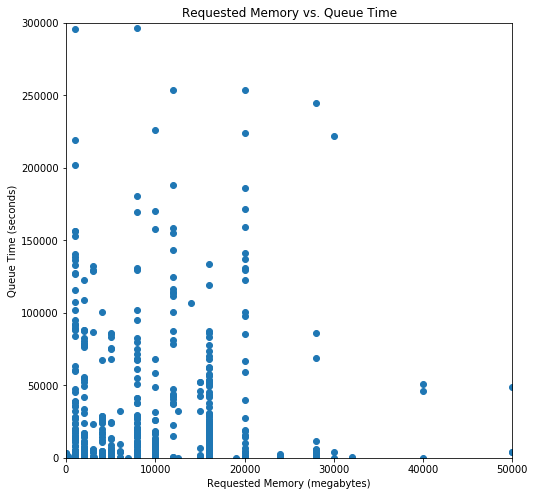

In [34]:
# create a scatter plot to visually see relationship between requested memory (megabytes) and queue time (seconds)
plt.figure(figsize=(8,8))
plt.scatter(x='ReqMem_Int', y='Queue_Seconds', data=user_queue_2_subset)
plt.ylim(0,300000)
plt.xlim(0,50000)
plt.title('Requested Memory vs. Queue Time')
plt.xlabel('Requested Memory (megabytes)')
plt.ylabel('Queue Time (seconds)')
plt.show()

It looks like requested memory may need to be treated as a categorial variable versus a numerical variable. From the scatterplot above, I am unable to accurately determine the relationship between Requested Memory and Queue Time.

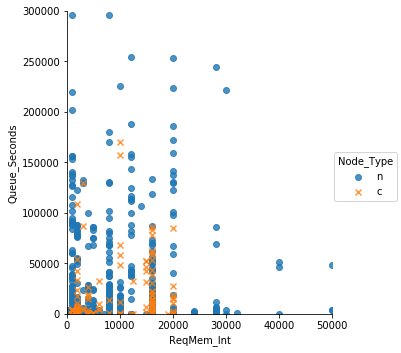

In [35]:
import seaborn as sns
sns.lmplot(x='ReqMem_Int', y='Queue_Seconds', hue='Node_Type', data=user_queue_2_subset, markers=['o','x'], fit_reg=False)
plt.ylim(0,300000)
plt.xlim(0,50000)
plt.show()

Again, it looks like we need to treat the Requested Memory as a categorical variable because I am not able to accurately determine the relationship between Requested Memory and Queue Time.

In [36]:
print(accre_reduced_cols.ReqMem_Int.describe())

count    1.249939e+07
mean     1.158983e+04
std      3.118329e+04
min      0.000000e+00
25%      4.000000e+03
50%      6.000000e+03
75%      1.600000e+04
max      1.000000e+08
Name: ReqMem_Int, dtype: float64


In [37]:
user_queue_2_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 11235573 to 12284379
Data columns (total 8 columns):
UID              623 non-null float64
User             1000 non-null object
ReqTime          998 non-null float64
Queue_Time       1000 non-null timedelta64[ns]
ReqMem           1000 non-null object
ReqMem_Int       1000 non-null float64
Node_Type        1000 non-null object
Queue_Seconds    1000 non-null float64
dtypes: float64(4), object(3), timedelta64[ns](1)
memory usage: 70.3+ KB


#### One way of getting the Requested Memory into categories would be to create a rule for each row. The categories will be: <4,000mb, 4,000-16,000mb, and >16,000mb. These categories are based on the statistics above.

In [38]:
# write a function that will split ReqMem_Int into separate categories
def category_label(row):
    if row['ReqMem_Int'] < 4000:
        return '<4000'
    elif row['ReqMem_Int'] >= 4000 and row['ReqMem_Int'] <= 16000:
        return '4000-16000'
    else:
        return '>16000'

In [39]:
user_queue_2_subset['ReqMem_Quartile'] = user_queue_2_subset.apply(lambda row: category_label(row),axis=1)
user_queue_2_subset.head()

/Users/davisthrailkill/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,UID,User,ReqTime,Queue_Time,ReqMem,ReqMem_Int,Node_Type,Queue_Seconds,ReqMem_Quartile
11235573,237602.0,smithst,43200.0,00:04:55,3Gn,3000.0,n,295.0,<4000
2362808,574202.0,sotocs,7200.0,00:44:45,10Gn,10000.0,n,2685.0,4000-16000
5987150,NaN,cmsglidein,172800.0,00:59:40,5000Mn,5000.0,n,3580.0,4000-16000
2896304,574202.0,sotocs,7200.0,03:08:16,10Gn,10000.0,n,11296.0,4000-16000
1810771,NaN,cmsglidein,172800.0,01:00:41,28000Mn,28000.0,n,3641.0,>16000


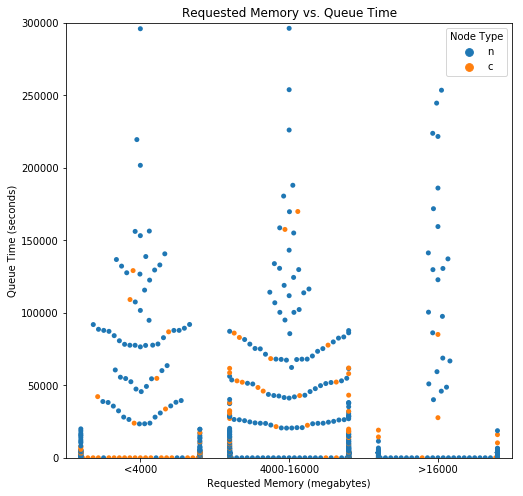

In [40]:
# plot ReqMem vs. Queue_Seconds
plt.figure(figsize=(8,8))
sns.swarmplot(x='ReqMem_Quartile', y='Queue_Seconds', hue='Node_Type', data=user_queue_2_subset, order=['<4000','4000-16000','>16000'])
plt.ylim(0,300000)
plt.xlabel('Requested Memory (megabytes)')
plt.ylabel('Queue Time (seconds)')
plt.title('Requested Memory vs. Queue Time')
plt.legend(loc='upper right', title='Node Type')
plt.show()

It is hard to tell from this plot, but it looks like there may be a negative correlation between Requested Memory and Queue Time. As a user requests more ram, the queue time decreases. However, it seems to be a very weak correlation. Let's take a look at the correlation using Pearson's Correlation Coefficient.

In [41]:
# find the correlation between ReqMem_Int and Queue_Seconds
user_queue_2_subset.ReqMem_Int.corr(user_queue_2_subset.Queue_Seconds, method='pearson')

0.0049410964300023105

As we can see, the correlation between Requested Memory and Queue time is negative but it is also very weak. This suggests that another variable may be affecting the Queue Time and that the amount of ram a user requests may not be as important when determining queue time.

# Question 1b: How does the amount of requested time affect a job's queue time?

### Let's repeat similar steps to analyze the relationship between Requested Time and Queue Time.

In [42]:
print(accre_reduced_cols.ReqTime.describe())

count    1.239072e+07
mean     1.101568e+05
std      1.583496e+05
min      6.000000e+01
25%      1.080000e+04
50%      7.200000e+04
75%      1.728000e+05
max      2.592000e+06
Name: ReqTime, dtype: float64


#### The categories for Requested Time will be: <10,800 seconds, 10,800-172,800 seconds, and >172,800 seconds.

In [43]:
# write a function that will split ReqTime into separate categories
def reqtime_label(row):
    if row['ReqTime'] < 10800:
        return '< 3'
    elif row['ReqTime'] >= 10800 and row['ReqTime'] <= 172800:
        return '3-48'
    else:
        return '> 48'

In [44]:
user_queue_2_subset['ReqTime_Quartile'] = user_queue_2_subset.apply(lambda row: reqtime_label(row),axis=1)
user_queue_2_subset.head()

/Users/davisthrailkill/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,UID,User,ReqTime,Queue_Time,ReqMem,ReqMem_Int,Node_Type,Queue_Seconds,ReqMem_Quartile,ReqTime_Quartile
11235573,237602.0,smithst,43200.0,00:04:55,3Gn,3000.0,n,295.0,<4000,3-48
2362808,574202.0,sotocs,7200.0,00:44:45,10Gn,10000.0,n,2685.0,4000-16000,< 3
5987150,NaN,cmsglidein,172800.0,00:59:40,5000Mn,5000.0,n,3580.0,4000-16000,3-48
2896304,574202.0,sotocs,7200.0,03:08:16,10Gn,10000.0,n,11296.0,4000-16000,< 3
1810771,NaN,cmsglidein,172800.0,01:00:41,28000Mn,28000.0,n,3641.0,>16000,3-48


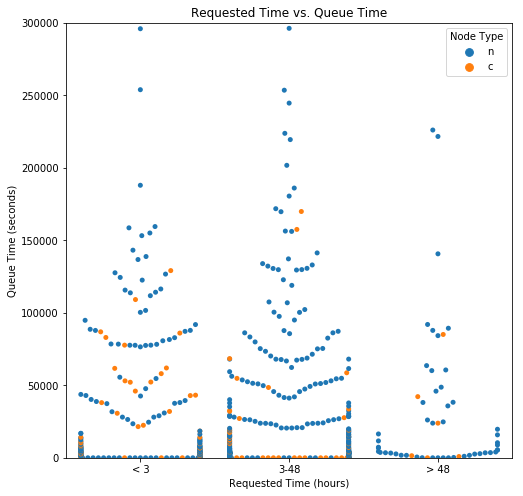

In [45]:
# plot ReqTime vs. Queue_Seconds
plt.figure(figsize=(8,8))
sns.swarmplot(x='ReqTime_Quartile', y='Queue_Seconds', hue='Node_Type', data=user_queue_2_subset, order=['< 3','3-48','> 48'])
plt.ylim(0,300000)
plt.xlabel('Requested Time (hours)')
plt.ylabel('Queue Time (seconds)')
plt.title('Requested Time vs. Queue Time')
plt.legend(loc='upper right', title='Node Type')
plt.show()

This plot showing Requested Time versus Queue time is similar to the plot of Requested Memory versus Queue Time. It appears that there may be a negative correlation between Requested Time and Queue Time, but let's take a look at Pearson's Correlation to be sure.

In [46]:
# find the correlation between ReqTime and Queue_Seconds
user_queue_2_subset.ReqTime.corr(user_queue_2_subset.Queue_Seconds, method='pearson')

-0.038716970642279205

The correlation above shows that there is a negative correlation between Requested Time and Queue Time, thus suggesting that as a user requests more time, the Queue Time decreases. However, the correlation appears to be very weak.

### From the analysis above, we can conclude that as a user requests more ram and more time, the queue time decreases. However, the correlations are very weak as we saw by looking at Pearson's Correlation Coefficient. There may be other variables affecting Queue Time, so further analysis is needed.

In [47]:
# see how many people are requesting nodes versus cores
accre_reduced_cols.Node_Type.value_counts()

n    10487045
c     2012344
Name: Node_Type, dtype: int64

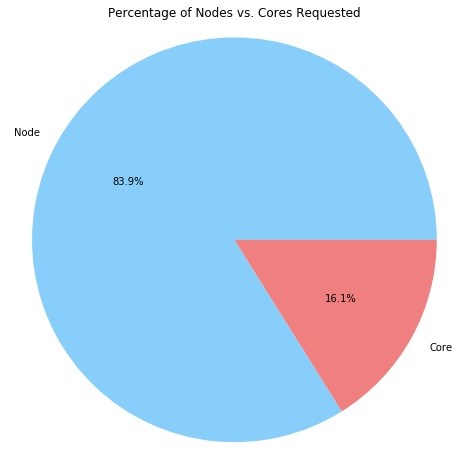

Percent Node: 83.90046105453635, Percent Core: 16.099538945463653


In [48]:
# create a pie chart to show percentage of nodes versus cores
pct_node = (10487045/(10487045+2012344))*100
pct_core = (2012344/(10487045+2012344))*100
labels = 'Node','Core'
sizes = [pct_node, pct_core]
colors = ['lightskyblue','lightcoral']
plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Percentage of Nodes vs. Cores Requested')
plt.axis('equal')
plt.show()
print('Percent Node: ' + str(pct_node) + ', ' + 'Percent Core: ' + str(pct_core))

About 84% of the jobs are using nodes and 16% are using cores. I am curious to know how the type of node (node vs. core) affects the queue time as well.

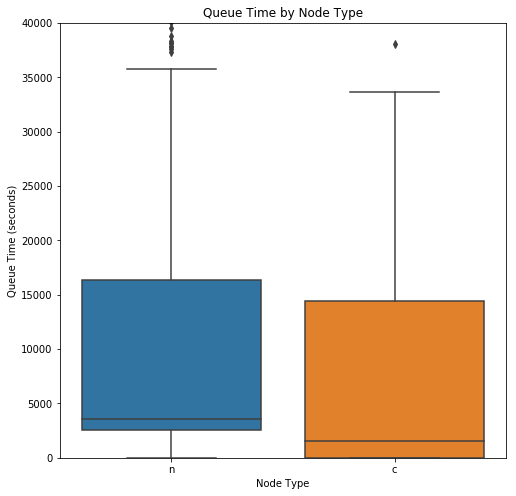

In [49]:
plt.figure(figsize=(8,8))
sns.boxplot(x='Node_Type', y='Queue_Seconds', data=user_queue_2_subset)
plt.ylim(0,40000)
plt.title('Queue Time by Node Type')
plt.xlabel('Node Type')
plt.ylabel('Queue Time (seconds)')
plt.show()

The boxplots above suggest that the median queue time for nodes is longer than the median queue time for cores, but there is also a wider range of queue time length in jobs requested cores than jobs requesting nodes.

## BEGIN DATA QUESTION 2

In [50]:
#get count of status
state_messages = accre.State.value_counts().to_frame().reset_index()
state_messages.columns = ["status","count"]
state_messages.head(20)

,status,count
0,COMPLETED,7150200
1,CANCELLED by 29607,3354734
2,FAILED,902907
3,CANCELLED by 29605,355327
4,TIMEOUT,160402
5,CANCELLED by 112888,105801
6,CANCELLED by 233674,66809
7,CANCELLED by 207302,44886
8,CANCELLED by 0,29569
9,CANCELLED by 551122,24607


In [51]:
#group cancelled statuses
import re
condition = re.compile("CANCELLED by\s\d*")
state_messages['status'] = state_messages.status.replace(to_replace=condition,value="CANCELLED")
state_messages.groupby("status")["count"].sum().to_frame().reset_index()

,status,count
0,CANCELLED,4270263
1,COMPLETED,7150200
2,FAILED,902907
3,NODE_FAIL,2192
4,PREEMPTED,13425
5,TIMEOUT,160402


In [52]:
# get jobs run per node (count of JobID grouped by NodeList)
jobs_per_node = accre.JobID.groupby(accre['NodeList']).agg('count')
jobs_per_node = jobs_per_node.to_frame()
jobs_per_node = jobs_per_node.iloc[1:,:]
jobs_per_node = jobs_per_node.sort_values(by="JobID",ascending=False)
jobs_per_node.head(5)

,JobID
NodeList,
vmp1409,92419
vmp1242,80662
vmp1257,74900
vmp1001,66221
vmp1298,47568


In [53]:
#jobs failed per node (count of JobID grouped by NodeList from )
state_failed = ['NODE_FAIL']
state_bad = accre.loc[accre['State'].isin(state_failed)]
fails_per_node = state_bad.JobID.groupby(state_bad['NodeList']).agg('count')
fails_per_node = fails_per_node.to_frame()
fails_per_node = fails_per_node.sort_values(by="JobID",ascending=False)
fails_per_node.head(10)

,JobID
NodeList,
vmp1354,31
vmp1350,24
vmp1352,22
vmp1347,18
vmp1349,17
vmp1339,16
vmp1374,16
vmp1351,14
vmp1342,14


In [54]:
#merge jobs run and jobs failed
node_fails_table = pd.merge(jobs_per_node,fails_per_node,on='NodeList',how='left')
node_fails_table = node_fails_table.rename({'JobID_x':'JobRuns','JobID_y':'JobFails'},axis=1)
node_fails_table.head()


,JobRuns,JobFails
NodeList,,
vmp1409,92419,1.0
vmp1242,80662,NaN
vmp1257,74900,4.0
vmp1001,66221,1.0
vmp1298,47568,1.0


In [55]:
#fill NA of JobFails with 0
node_fails_table = node_fails_table.dropna()


In [56]:
#create Fail% column & sort
node_fails_table['Fail%'] = node_fails_table.JobFails/node_fails_table.JobRuns
node_fails_table.sort_values(by='JobRuns', ascending=False)



,JobRuns,JobFails,Fail%
NodeList,,,
vmp1409,92419,1.0,0.000011
vmp1257,74900,4.0,0.000053
vmp1001,66221,1.0,0.000015
vmp1298,47568,1.0,0.000021
vmp1003,38681,1.0,0.000026
vmp1010,36912,1.0,0.000027
vmp1061,36322,5.0,0.000138
vmp1002,36047,1.0,0.000028
vmp1013,34403,2.0,0.000058


In [57]:
#drop rows with no jobs failed or <100 jobs run
condition1 = node_fails_table.JobFails != 0
condition2 = node_fails_table.JobRuns > 100



In [58]:
node_fails_table = node_fails_table[condition1&condition2]



In [59]:
#show sorted table
node_fails_table = node_fails_table.sort_values(by='Fail%',ascending=False)
node_fails_table


,JobRuns,JobFails,Fail%
NodeList,,,
vmp595,1018,8.0,0.007859
vmp598,1042,7.0,0.006718
vmp592,1084,7.0,0.006458
vmp692,1117,7.0,0.006267
vmp696,1118,7.0,0.006261
gpu0022,505,3.0,0.005941
vmp695,1097,5.0,0.004558
gpu0010,1097,5.0,0.004558
vmp597,1099,5.0,0.004550


Text(0.5,1,'Top Five Nodes by Rate of Failure')

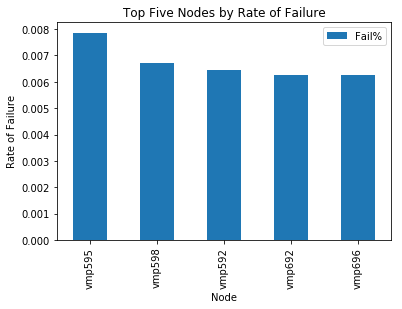

In [60]:
#barplot of top 5 
node_fails_table[["Fail%"]].iloc[0:5,:].plot(kind="bar")
plt.xlabel("Node")
plt.ylabel("Rate of Failure")
plt.title("Top Five Nodes by Rate of Failure")


testing, please work!